# Data Preprocessing

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
nltk.download('stopwords')
nltk.download('punkt')

import string
import re
import emoji

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize.toktok import ToktokTokenizer
from gensim.parsing.porter import PorterStemmer
from gensim.utils import simple_preprocess


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Inspiron5000\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Inspiron5000\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Loading Dataset
Datasets used are the ones from the LDA output and also the original dataset. These datasets are merged into one in order to get the original content of data again. 

In [2]:
df2 = pd.read_csv('topic_negative.csv')
df1 = pd.read_csv('reviews_2.csv')

In [5]:
df3 = pd.merge(df1, df2, on=['userName', 'at'])

In [6]:
df3

,reviewId,userName,userImage,content,score_x,thumbsUpCount_x,reviewCreatedVersion_x,at,replyContent,repliedAt,reviews,score_y,thumbsUpCount_y,reviewCreatedVersion_y,sentiment,noun,dominant_topic,confidence,dominant_topic_theme
0,gp:AOqpTOERoUEsOjFWwjUFFr4oQGCClwHSv5puWPsw9e1...,A B C,https://play-lh.googleusercontent.com/a-/AOh14...,"Ini aplikasinya pejabat, karena harga diskon p...",1,0,NaN,2021-12-29 15:19:11,NaN,NaN,aplikasinya pejabat harga diskon promosinya me...,1,0,missing,Negative,"['aplikasinya', 'pejabat', 'harga', 'diskon', ...",5,0.176348,ongkir
1,gp:AOqpTOErxRadKDptfyWfyGPeYJ0i5I4WOJ-fcYRPg87...,Bahrul Alamsyah,https://play-lh.googleusercontent.com/a-/AOh14...,Proses refund saldo aja harus nunggu 1-3 hari ...,1,0,8.3.5,2021-12-29 13:55:51,NaN,NaN,proses refund saldo menunggu pikir belanja pak...,1,0,8.3.5,Negative,"['proses', 'refund', 'menunggu', 'pikir', 'bel...",3,0.989008,pembayaran
2,gp:AOqpTOFTghLeO4iKsZihfjRh3J4rFbtUlTMm536EJ3M...,Agus Nurrohmad,https://play-lh.googleusercontent.com/a-/AOh14...,"pesanan selalu otomatis dibatalakan, uda chat ...",1,0,8.3.5,2021-12-29 12:10:44,NaN,NaN,pesan otomatis dibatalakan chat hasil,1,0,8.3.5,Negative,"['otomatis', 'dibatalakan', 'chat', 'hasil']",3,0.645165,pembayaran
3,gp:AOqpTOFdw6FOwbisFLukAaLRvXtMvCgkJnzntrEKdir...,Annisa Aprianti hartono,https://play-lh.googleusercontent.com/a/AATXAJ...,Saya baru download trus baru belanja eh malah ...,1,0,NaN,2021-12-29 12:07:01,NaN,NaN,unduh terus belanja pesan batalkan blipay nona...,1,0,missing,Negative,"['belanja', 'blipay', 'saldo', 'aduh', 'nyaman']",3,0.482481,pembayaran
4,gp:AOqpTOHsZxiw16xnWbjE1SLq8iG4DBL2ZGVDQFFBr8y...,Alpha Xborg,https://play-lh.googleusercontent.com/a/AATXAJ...,Katanya gratis ongkir cuma hayalan,1,0,8.3.5,2021-12-29 09:36:01,NaN,NaN,gratis ongkos kirim khayalan,1,0,8.3.5,Negative,"['gratis', 'khayalan']",5,0.000042,ongkir
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21138,gp:AOqpTOFDVldUHClZ7u1mcp2BK_PNHnhaoD31gbKIcpn...,Yoseptian Gonta,https://play-lh.googleusercontent.com/a-/AOh14...,"Proses lambat, untuk view 1 produk butuh waktu...",2,0,1.2.1,2014-01-21 09:37:26,"Hi kak terima kasih ya utk feedbacknya, kami a...",2020-02-03 07:09:43,proses lambat view produk butuh detik beda app...,2,0,1.2.1,Negative,"['proses', 'lambat', 'view', 'produk', 'butuh'...",4,0.049784,order
21139,gp:AOqpTOHgEFO4rc1zb_d4TDGFaqwRaEObi9P11GrNRkG...,Ichsan Winyetra,https://play-lh.googleusercontent.com/a-/AOh14...,"Way too slow,, just good on the Web.",1,1,1.2.1,2013-12-25 10:49:43,we apologize for the problem :( please call ou...,2020-02-29 17:24:40,slow good,1,1,1.2.1,Negative,[],0,0.000000,barang
21140,gp:AOqpTOGGeEVWsqbhkdgaMzDF3pEmPMngMWvJk_x2COQ...,denny parulian,https://play-lh.googleusercontent.com/a-/AOh14...,maybe your ux team is not aware about this thi...,2,0,1.2.1,2013-12-22 16:53:45,It is unfortunate for the obstacles that occur...,2020-02-29 19:20:04,maybe tim aware thing forgotten password apps,2,0,1.2.1,Negative,"['thing', 'forgotten', 'password', 'apps']",6,0.172111,akun
21141,gp:AOqpTOE93PAuUU9QFCscOUhL0SVLnpIyCzWLcj-ys-G...,Paramitta Sekar,https://play-lh.googleusercontent.com/a-/AOh14...,Cant access collection menu. Uninstall,1,0,1.2,2013-12-15 15:54:45,we apologize for the problem :( please call ou...,2020-02-29 19:25:17,can't access collection menu uninstall,1,0,1.2,Negative,"['access', 'collection', 'menu', 'uninstall']",3,0.401660,pembayaran


In [7]:
df = pd.DataFrame(df3, columns=['content', 'reviews', 'score_x', 'reviewCreatedVersion_x', 'at', 'dominant_topic_theme'])
df = df.rename(columns={'dominant_topic_theme': 'topic'})
df = df.rename(columns={'score_x': 'score'})
df = df.rename(columns={'reviewCreatedVersion_x': 'reviewCreatedVersion'})

In [10]:
df

,content,reviews,score,version,at,topic
0,"Ini aplikasinya pejabat, karena harga diskon p...",aplikasinya pejabat harga diskon promosinya me...,1,NaN,2021-12-29 15:19:11,ongkir
1,Proses refund saldo aja harus nunggu 1-3 hari ...,proses refund saldo menunggu pikir belanja pak...,1,8.3.5,2021-12-29 13:55:51,pembayaran
2,"pesanan selalu otomatis dibatalakan, uda chat ...",pesan otomatis dibatalakan chat hasil,1,8.3.5,2021-12-29 12:10:44,pembayaran
3,Saya baru download trus baru belanja eh malah ...,unduh terus belanja pesan batalkan blipay nona...,1,NaN,2021-12-29 12:07:01,pembayaran
4,Katanya gratis ongkir cuma hayalan,gratis ongkos kirim khayalan,1,8.3.5,2021-12-29 09:36:01,ongkir
...,...,...,...,...,...,...
21138,"Proses lambat, untuk view 1 produk butuh waktu...",proses lambat view produk butuh detik beda app...,2,1.2.1,2014-01-21 09:37:26,order
21139,"Way too slow,, just good on the Web.",slow good,1,1.2.1,2013-12-25 10:49:43,barang
21140,maybe your ux team is not aware about this thi...,maybe tim aware thing forgotten password apps,2,1.2.1,2013-12-22 16:53:45,akun
21141,Cant access collection menu. Uninstall,can't access collection menu uninstall,1,1.2,2013-12-15 15:54:45,pembayaran


## Data Cleaning
The data cleaning process is alsmost the same as in topic modelling, which is by:
1. Feature Selection
2. Replacing informal words to formal by using some dataset taken from Github which are called "Kamus Alay" and also replacing some letter repetition
2. Removing special characters and also emojis
3. Removing unnecessary data such as noise words and stopwords


In [11]:
stopwords_all = stopwords.words("indonesian") + stopwords.words("english")
stopwords_baru = ['sih', 'nya', 'iya', 'tah', 'ok', 'oke','bagus', 'eh', 'nya', 'jelek', 'coba', 'kecewa', 'banget', 'kayak', 'semoga', 'buruk', 'gue', 'kali', 'pas', 'mulu',
                  'sebelah', 'langsung', 'suka', 'maaf', 'sih', 'nya', 'di', 'ada', 'tempat', 'untuk', 'yang', 'ini', 'lagi', 'ya',
                  'saja', 'kok', 'deh', 'kalau', 'dan', 'kan', 'yg', 'dg', 'rt', 'dgn', 'ny', 'd', 'klo','kalo', 'amp', 'biar',
                  'bikin', 'bilang', 'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 'jd', 
                  'jgn', 'sdh', 'aja', 'n', 't', 'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt','&amp', 'yah', 'ni', 'lg', 'tapi',
                  'bisa', 'tah', 'ya', 'sy', 'aku', 'dong', 'ud', 'dr', 'mn', 'km', 'keren', 'puas', 'sip', 'entar', 'jaya', 'mohon', 'lumayan', 'keren', 'god', 'pok', 'love', 'mntap', 'jiwa', 'okee',
                 'seng', 'okey', 'pokoknya', 'tolong', 'benaran', 'mudahan', 'bro', 'goodd', 'bosku', 'bank', 'bank', 'amin', 'gampang', 'malas', 'berat', 'mending', 'goblok', 'tol', 'mantap']
stopwords_all = stopwords_all + stopwords_baru

kamus_alay = pd.read_csv('new_kamusalay.csv', encoding="ISO-8859-1", header=None)

kamus_alay.loc[len(kamus_alay.index)] = ['onkir', 'ongkir'] 
kamus_alay.loc[len(kamus_alay.index)] = ['blanja', 'belanja'] 
kamus_alay.loc[len(kamus_alay.index)] = ['uninstal', 'uninstall'] 
kamus_alay.loc[len(kamus_alay.index)] = ['exsis', 'eksis'] 
kamus_alay.loc[len(kamus_alay.index)] = ['verivikasi', 'verifikasi'] 
kamus_alay.loc[len(kamus_alay.index)] = ['recomended', 'recommended'] 
kamus_alay.loc[len(kamus_alay.index)] = ['bajuz', 'bagus'] 
kamus_alay.loc[len(kamus_alay.index)] = ['gw', 'gue'] 
kamus_alay.loc[len(kamus_alay.index)] = ['casback', 'cashback'] 
kamus_alay.loc[len(kamus_alay.index)] = ['donlwod', 'download'] 
kamus_alay.loc[len(kamus_alay.index)] = ['donlod', 'download'] 
kamus_alay.loc[len(kamus_alay.index)] = ['mw', 'mau'] 
kamus_alay.loc[len(kamus_alay.index)] = ['chasbcak', 'cashback']
kamus_alay.loc[len(kamus_alay.index)] = ['puazzz', 'puas'] 
kamus_alay.loc[len(kamus_alay.index)] = ['puaaas', 'puas'] 
kamus_alay.loc[len(kamus_alay.index)] = ['mmbntu', 'membantu'] 
kamus_alay.loc[len(kamus_alay.index)] = ['diblibli', 'blibli'] 
kamus_alay.loc[len(kamus_alay.index)] = ['gratong', 'gratis ongkir'] 
kamus_alay.loc[len(kamus_alay.index)] = ['cust', 'customer'] 
kamus_alay.loc[len(kamus_alay.index)] = ['bibli', 'blibli']
kamus_alay.loc[len(kamus_alay.index)] = ['mncul', 'muncul']
kamus_alay.loc[len(kamus_alay.index)] = ['enag', 'enak']
kamus_alay.loc[len(kamus_alay.index)] = ['tlong', 'tolong']
kamus_alay.loc[len(kamus_alay.index)] = ['goodapp', 'good app']
kamus_alay.loc[len(kamus_alay.index)] = ['addres', 'address']
kamus_alay.loc[len(kamus_alay.index)] = ['adlh', 'adalah']
kamus_alay.loc[len(kamus_alay.index)] = ['aplikasiny', 'aplikasi']
kamus_alay.loc[len(kamus_alay.index)] = ['aplikasix', 'aplikasi']
kamus_alay.loc[len(kamus_alay.index)] = ['aplikasiyg', 'aplikasi'] 
kamus_alay.loc[len(kamus_alay.index)] = ['aplikask', 'aplikasi']
kamus_alay.loc[len(kamus_alay.index)] = ['aplikaso', 'aplikasi']
kamus_alay.loc[len(kamus_alay.index)] = ['aplilasi', 'aplikasi']
kamus_alay.loc[len(kamus_alay.index)] = ['aplk', 'aplikasi']
kamus_alay.loc[len(kamus_alay.index)] = ['aplkasi', 'aplikasi']
kamus_alay.loc[len(kamus_alay.index)] = ['aamsung', 'samsung']
kamus_alay.loc[len(kamus_alay.index)] = ['apl', 'aplikasi']
kamus_alay.loc[len(kamus_alay.index)] = ['cant', "can't"]
kamus_alay.loc[len(kamus_alay.index)] = ['ux', 'user-experience']


indonesian_lexicon = pd.read_csv('lexicon.csv', encoding="ISO-8859-1", header=None)
indonesian_lexicon= indonesian_lexicon[[0, 1]]

frames = [kamus_alay, indonesian_lexicon]
  
kamus = pd.concat(frames)

kamus_alay_dict = {}
for i, row in kamus.iterrows():
  kamus_alay_dict[row[0]] = row[1]


In [12]:
import string
import emoji
bins = [0, 2, 5]
names = ['Negative', 'Positive']
exclist = string.digits + string.punctuation

def preprocess(s):
    s = re.sub(r'([a-z])([A-Z])', r'\1\. \2', s) 
    s = s.lower()
    s = re.sub(r'&gt|&lt', ' ', s)
    # letter repetition (if more than 2)
    s = re.sub(r'([a-z])\1{2,}', r'\1', s)
    # non-word repetition (if more than 1)
    s = re.sub(r'([\W+])\1{1,}', r'\1', s)
    # phrase repetition
    s = re.sub(r'(.{2,}?)\1{1,}', r'\1', s)
    s = ' '.join([kamus_alay_dict.get(w, w) for w in s.split()])
    
    return s.strip()

def remove_stopwords(text, is_lower_case=False):
    tokenizer = ToktokTokenizer()
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords_all]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords_all]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

def remove_special_characters(oldtext, remove_digits=True):
    table_ = str.maketrans(exclist, ' '*len(exclist))
    newtext = ' '.join(oldtext.translate(table_).split())
    return newtext

def give_emoji_free_text(text):
    return emoji.get_emoji_regexp().sub(r'', text)

def clean_data(df):
    filtered = pd.DataFrame(df, columns=['userName', 'content', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at'])
    filtered["reviewCreatedVersion"].fillna("missing", inplace=True)
    filtered.dropna(inplace=True)
    filtered = filtered.reset_index()
    filtered = filtered.drop(columns=['index'])
        
    filtered['preprocessed']=filtered['content'].apply(remove_special_characters)
    filtered['preprocessed']=filtered['preprocessed'].apply(give_emoji_free_text)

    filtered = filtered.dropna()
    filtered = filtered.reset_index()
    filtered = filtered.drop(columns=['index'])
    
    for indices, row in filtered.iterrows():
        sentence = preprocess(filtered['preprocessed'][indices])
        filtered['preprocessed'][indices] = sentence
        
    filtered['sentiment'] = pd.cut(filtered['score'], bins, labels=names)
    filtered['preprocessed'] = filtered['preprocessed'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2])) 
    filtered['preprocessed'] = filtered['preprocessed'].apply(lambda x: ' '.join([w for w in x.split() if len(w)<12]))
    filtered['preprocessed'] = filtered['preprocessed'].str.lower()
    
    filtered['preprocessed'] = filtered['preprocessed'].apply(remove_stopwords)
    filtered = filtered.replace(r'^\s*$', np.NaN, regex=True)
    filtered = filtered.dropna()
    filtered['preprocessed'] = filtered['preprocessed'].str.lower()
    filtered =  filtered.reset_index()
    filtered = filtered.drop(columns=['index'])
    return filtered


df = clean_data(df)

<ipython-input-12-ce61777ed03d>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['preprocessed'][indices] = sentence


## Data Tokenization

In [14]:
df['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in df['preprocessed']] 
print(df['tokenized_text'].head(10))

0    [aplikasinya, pejabat, harga, diskon, promosin...
1    [proses, refund, saldo, menunggu, pikir, belan...
2    [pesan, otomatis, dibatalakan, chat, rekan, ha...
3    [unduh, belanja, pesan, batalkan, blipay, nona...
4                    [gratis, ongkos, kirim, khayalan]
5                [selamat, beli, kehilangan, konsumen]
6    [spin, wheel, realme, kasih, poin, doang, bang...
7    [aplikasi, commerce, terburuk, daftar, masuk, ...
8                             [check, batalkan, parah]
9    [beli, diamond, jenis, vocer, seller, pakai, p...
Name: tokenized_text, dtype: object


## Word Embedding using Pretrained Fast Text model
The pretrained model is downloaded from Fasttext's page: https://fasttext.cc/docs/en/crawl-vectors.html

FastText is a library created by the Facebook Research Team for efficient learning of word representations and sentence classification. The advantage of using Fasttext is that it is helpful to find the vector representation for rare words. Since rare words could still be broken into character n-grams, they could share these n-grams with the common words. It can also be used to give vector representations for the words not present in the dictionary, which is suitable for our review data because there are many unidentified words in it that needs to be trained. 

In [15]:
# function to prepare the pretrained model
def prepare_tokenizer_and_weights(X):
    tokenizer = Tokenizer(filters='')
    tokenizer.fit_on_texts(X)
    
    weights = np.zeros((len(tokenizer.word_index)+1, 300))
    with open("cc.id.300.vec/cc.id.300.vec", encoding="utf8") as f:
        next(f)
        for l in f:
            w = l.split(' ')
            if w[0] in tokenizer.word_index:
                weights[tokenizer.word_index[w[0]]] = np.array([float(x) for x in w[1:301]])
    return tokenizer, weights

### Splitting Data
X is the values that will be used as input in the model and Y is the output. In this case, X will be the values of reviews and y is the labels that we want to predict. 

In [16]:
from sklearn.model_selection import train_test_split
X = df['preprocessed'].values

# Covert categorical data into numerical
y = pd.get_dummies(df['topic']).values

### Truncate and pad the input sequences so that they are all in the same length for modeling

In [20]:
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# calling the function
tokenizer, weights = prepare_tokenizer_and_weights(X)
X_seq = tokenizer.texts_to_sequences(X)
MAX_LEN = max(map(lambda x: len(x), X_seq))
X_seq = pad_sequences(X_seq, MAX_LEN)
MAX_ID = len(tokenizer.word_index)
print('MAX_LEN=', MAX_LEN)
print('MAX_ID=', MAX_ID)

MAX_LEN= 87
MAX_ID= 15390


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_seq, y) 
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(15576, 87) (15576, 10)
(5192, 87) (5192, 10)


## Building the Model
The layers used in the model: 
1. The first layer is the input layer used to instantiate the tensor model, in which the size of it is the same as the length of the word vector above. 
2. The second layer is the embedded layer that uses MAX_ID as the input dimension, output dimension being 300 from the built in FastText dimension, and weights used is from the weights of the pretrained model. 
3. The third layer is the Bidirectional LSTM used with 100 memory units. Bidirectional LSTMs are an extension of traditional LSTMs that can improve model performance on sequence classification problems. In problems where all timesteps of the input sequence are available, Bidirectional LSTMs train two instead of one LSTMs on the input sequence. The first on the input sequence as-is and the second on a reversed copy of the input sequence. This can provide additional context to the network and result in faster and even fuller learning on the problem.
4. The output layer must create 10 output values, one for each class/label that we want to predict.
5. Activation function is softmax for multi-class classification.
6. Because it is a multi-class classification problem, categorical_crossentropy is used as the loss function.


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D, InputLayer, Bidirectional
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

model_lstm2 = Sequential()
model_lstm2.add(InputLayer((MAX_LEN,))) 
model_lstm2.add(Embedding(input_dim=MAX_ID+1, output_dim=300, weights=[weights], trainable=True))
# model_lstm2.add(SpatialDropout1D(0.1))
model_lstm2.add(Bidirectional(LSTM(units=100)))
model_lstm2.add(Dense(10, activation='softmax'))
model_lstm2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_lstm2.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 87, 300)           4617300   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 200)               320800    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2010      
Total params: 4,940,110
Trainable params: 4,940,110
Non-trainable params: 0
_________________________________________________________________


### Early Stopping and Modal Checkpoint
Early stopping is a method that allows you to specify an arbitrary large number of training epochs and stop training once the model performance stops improving on a hold out validation dataset .An additional callback is required that will save the best model observed during training for later use which is called the ModelCheckpoint callback. 


In [32]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

metric = 'val_accuracy'

keras_callbacks   = [
      EarlyStopping(monitor='val_accuracy', patience=5, mode='max'),
      ModelCheckpoint("tc_neg_3.hdf5", monitor=metric, verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
]

history = model_lstm2.fit(X_train, y_train, validation_split=0.1, epochs=10,callbacks=[keras_callbacks])

Epoch 1/10
439/439 [==============================] - 121s 271ms/step - loss: 1.4939 - accuracy: 0.5142 - val_loss: 1.1143 - val_accuracy: 0.6451

Epoch 00001: val_accuracy improved from -inf to 0.64506, saving model to tc_neg_3.hdf5
Epoch 2/10
439/439 [==============================] - 108s 247ms/step - loss: 0.7335 - accuracy: 0.7764 - val_loss: 0.9872 - val_accuracy: 0.6752

Epoch 00002: val_accuracy improved from 0.64506 to 0.67522, saving model to tc_neg_3.hdf5
Epoch 3/10
439/439 [==============================] - 105s 239ms/step - loss: 0.3063 - accuracy: 0.9053 - val_loss: 1.0757 - val_accuracy: 0.6759

Epoch 00003: val_accuracy improved from 0.67522 to 0.67587, saving model to tc_neg_3.hdf5
Epoch 4/10
439/439 [==============================] - 88s 200ms/step - loss: 0.1618 - accuracy: 0.9517 - val_loss: 1.1728 - val_accuracy: 0.6893

Epoch 00004: val_accuracy improved from 0.67587 to 0.68935, saving model to tc_neg_3.hdf5
Epoch 5/10
439/439 [==============================] - 10

In [46]:
accr = model_lstm2.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

163/163 [==============================] - 5s 30ms/step - loss: 1.7761 - accuracy: 0.6643
Test set
  Loss: 1.776
  Accuracy: 0.664


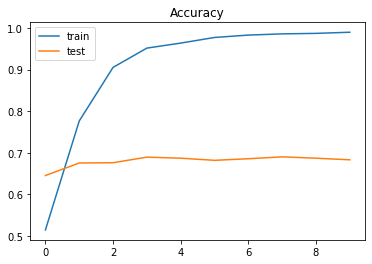

In [35]:
import matplotlib.pyplot as plt

plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

## Model Prediction
The data used in the cell below is the Test dataset which contains new reviews from December 2021 until present date. The reason we use this data to classify is because it is most recent, therefore it will be beneficial to identify. 

In [49]:
test = pd.read_csv('test_data.csv')
test

,at,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,replyContent,repliedAt
0,2022-01-11 20:57:38,gp:AOqpTOFXHNDd5G4aY69ZX6OT4eGUAv-48d6JYqhayU7...,HERDY NOVA SIMANULLANG,https://play-lh.googleusercontent.com/a-/AOh14...,Apakah gunanya nomor handphone jika lupa sandi...,1,0,8.3.5,NaN,NaN
1,2022-01-11 20:54:48,gp:AOqpTOGsjYB3NBjvDcvcTiLQnn6c85NCAyPTM4Oa6W6...,Yaya Daryana,https://play-lh.googleusercontent.com/a/AATXAJ...,"Alhamdulillah lancar""aja",3,0,8.3.5,NaN,NaN
2,2022-01-11 19:56:19,gp:AOqpTOFsbE10h5QID0N57doxlik-deOYwVkACM4hdrT...,Sony Prasetyo,https://play-lh.googleusercontent.com/a-/AOh14...,blibli mantap betul proses mudah bunga rendah ...,5,0,8.3.5,NaN,NaN
3,2022-01-11 19:52:31,gp:AOqpTOEBgah1hc4qe9fdoixRJgFTFvElqdDPuqx9Nwj...,Abdulah Maan,https://play-lh.googleusercontent.com/a/AATXAJ...,good app,5,0,8.3.5,NaN,NaN
4,2022-01-11 19:42:46,gp:AOqpTOE7-52NoSvLh5jCzaCiigQWe7o_tVwczOHp8pc...,Moch Ramdon Ansori,https://play-lh.googleusercontent.com/a/AATXAJ...,mantap. tingkatkan terus diskon nya. 😍,5,0,8.3.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2329,2021-12-02 23:05:20,gp:AOqpTOH3pAJ1mZWGLuVZYJ_AMPAIhnAoVzfiXLxFgzW...,Kapan Kapan,https://play-lh.googleusercontent.com/a-/AOh14...,Bagus sekali,5,0,8.2.1,"Hi kak, makasih ya sudah percayakan Blibli.com...",2021-12-03 07:49:23
2330,2021-12-01 22:53:30,gp:AOqpTOECgAUPwnWZZLFVs16gEziI1W-XnJ-Ge09N33X...,Yusman Hartanto,https://play-lh.googleusercontent.com/a-/AOh14...,Membatalkan pesanan malah jd voucher belanja d...,1,0,8.2.1,Halo kak Yusman mohon maaf pengalaman berbelan...,2022-01-10 14:02:53
2331,2021-12-01 22:06:46,gp:AOqpTOE1zMDz2XLvcLOATckkVEW_USY7tq0471GLt2L...,Muhammad Faishal Amajid,https://play-lh.googleusercontent.com/a-/AOh14...,Aplikasi lemot,1,1,8.2.1,Hai Kak Muhammad mohon maaf pengalaman belanja...,2021-12-03 16:23:21
2332,2021-12-01 12:32:34,gp:AOqpTOHz3qmn_upjpJCzao58Xlhw3VKb9Lpqt60Ga6o...,Daud Firdaus,https://play-lh.googleusercontent.com/a-/AOh14...,Dengan adanya multi limit... Maksimal limit pa...,1,0,8.2.1,"Hai kak, makasih sudah tertarik dengan Blibli....",2021-12-09 16:10:11


In [41]:
bins = [0, 2, 5]
names = ['Negative', 'Positive']
test['sentiment'] = pd.cut(test['score'], bins, labels=names)

neg_df = test[test['sentiment'] == 'Negative']
neg_df = clean_data(neg_df)

x_test = neg_df['content'].values
x_test = tokenizer.texts_to_sequences(x_test)
x_test = pad_sequences(x_test, MAX_LEN)
neg_df['dominant_topic_theme'] = ""

y_pred = model_lstm2.predict(x_test)

for i, x in zip(range(len(neg_df)), y_pred):
    neg_df['dominant_topic_theme'][i] = labels[np.argmax(x)]

<ipython-input-39-930b54dd56b4>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['preprocessed'][indices] = sentence
<ipython-input-41-ef6a82407847>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_df['dominant_topic_theme'][i] = labels[np.argmax(x)]


In [43]:
neg_df.to_csv('output_test_neg.csv')

In [34]:
new_complaint = ['pengiriman katanya gratis tapi ternyata tidak']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, MAX_LEN)
pred = model_lstm2.predict(padded)
labels = ['akun','app performance','barang','error','iklan','kredit', 'ongkir','order',
                'pembayaran','pencarian']
print(pred, '\n', labels[np.argmax(pred)], np.argmax(pred))

[[1.5839458e-07 3.8275934e-06 2.3348828e-05 9.6257536e-06 7.8203557e-06
  4.6299724e-07 9.9987113e-01 8.3140971e-05 2.8394291e-07 2.0257005e-07]] 
 ongkir 6


# Data Visualization on Output

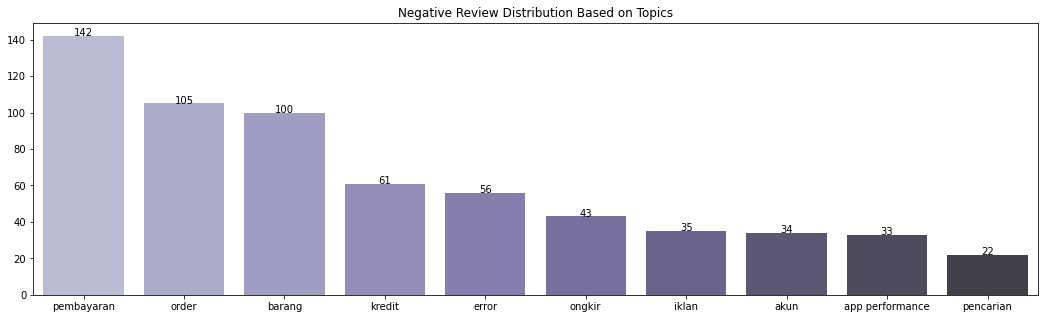

In [44]:
def show_values_on_bars(ax, h_v, space):
    if h_v == "v":
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = int(p.get_height())
            ax.text(_x, _y, value, ha="center") 
    elif h_v == "h":
        for p in ax.patches:
            _x = p.get_x() + p.get_width() + float(space)
            _y = p.get_y() + p.get_height()
            value = int(p.get_width())
            ax.text(_x, _y, value, ha="left")

data_2021 = neg_df
ratings = data_2021['dominant_topic_theme'].value_counts()
name = ratings.index.tolist()
amount = ratings.values.tolist()

plt.figure(1 , figsize = (18, 5))
ax = sns.barplot(x = name, y = amount, palette="Purples_d")
show_values_on_bars(ax, "v", 10)
ax.set_title('Negative Review Distribution Based on Topics')
plt.show()

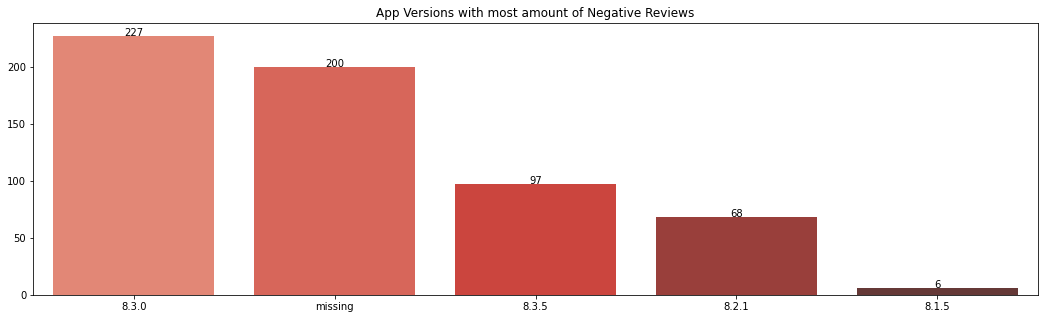

In [52]:
data_2021 = neg_df
ratings = data_2021['reviewCreatedVersion'].value_counts()[:5]
name = ratings.index.tolist()
amount = ratings.values.tolist()

plt.figure(1 , figsize = (18, 5))
ax = sns.barplot(x = name, y = amount, palette="Reds_d")
show_values_on_bars(ax, "v", 10)
ax.set_title('App Versions with most amount of Negative Reviews')
plt.show()

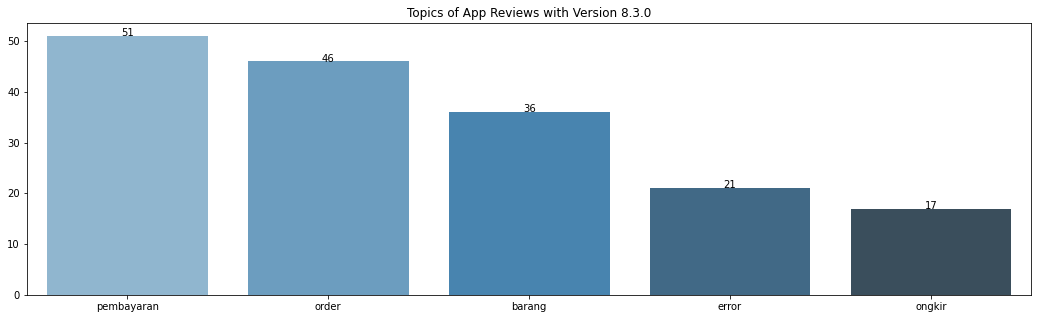

In [69]:
data_2021 = neg_df.query('reviewCreatedVersion == "8.3.0"')
ratings = data_2021['dominant_topic_theme'].value_counts()[:5]
name = ratings.index.tolist()
amount = ratings.values.tolist()

plt.figure(1 , figsize = (18, 5))
ax = sns.barplot(x = name, y = amount, palette="Blues_d")
show_values_on_bars(ax, "v", 10)
ax.set_title('Topics of App Reviews with Version 8.3.0')
plt.show()

In [68]:
pembayaran_data = data_2021.query('reviewCreatedVersion == "8.3.0" & dominant_topic_theme == "pembayaran"')
pembayaran_data['content'].sample(1).values

array(['Sy baru instal dan memakai vocher pengguna baru. Sudah cek out pesanan, tp Kenapa pesanan saya dibatalkan sepihak oleh blibli???'],
      dtype=object)